# Analysis of Sonia Gandhi's Interview with Rajdeep Sardesai
The analysis was based on the transcript available on the India Today website
http://indiatoday.intoday.in/story/sonia-gandhi-interview-rajdeep-sardesai-pm-modi-transcript/1/816508.html

databulary.net

In [27]:
import re
import pandas as pd
import numpy as np

#Open and read file , read as 'person : Talk '
f = open('/Users/yashodhanjoglekar/Documents/Sonia_interview', 'r')
strings = re.findall('(\w+)\:(.*)', f.read()) #RegEx 
f.close() #Close file
 
Interview = pd.DataFrame(strings,columns =['Person','Talk'])
Interview['Count']= Interview['Talk'].apply(lambda x: len(x.split()))
Interview.head()

,Person,Talk,Count
0,Rajdeep,Hello and welcome to this India Today special...,77
1,Sonia,Absolutely and very well. She was in London o...,110
2,Rajdeep,She was already the PM at that time!,8
3,Sonia,"No. This was in 1965. So, he had to excuse hi...",44
4,Rajdeep,Why were you frightened to meet Mrs Gandhi??,8


In [28]:
#Convert to a dataframe and name columns, Count words used , Calculate time / Answer
Interview = pd.DataFrame(strings,columns =['Person','Talk'])
Interview['Count']= Interview['Talk'].apply(lambda x: len(x.split()))
Interview_duration = 37 #In minutes
Interview['Time'] = (Interview['Count']*Interview_duration)/Interview['Count'].sum()

# Check number  of people in the file and get word count
Interview.groupby('Person')['Count','Time'].agg({'count','sum','mean'}).reset_index()

Person Count                   Time                     
           count   sum       mean count        sum      mean
0  Rajdeep    88  2292  26.045455    88  18.532343  0.210595
1    Sonia    88  2284  25.954545    88  18.467657  0.209860

In [29]:
#Total length of interview was 37 minutes
#Calcuate Cumulative time and Cumulative word count
Interview['Time']= Interview['Count'].apply(lambda x: x*(Interview_duration/Interview['Count'].sum()))
Interview['CumTime'] = Interview.Time.cumsum()
Interview['CumCount'] = Interview.groupby(['Person'])['Count'].apply(lambda x: x.cumsum())
Interview['CumTimeIndividual'] = Interview.groupby(['Person'])['Time'].apply(lambda x: x.cumsum())
Interview.head(3)

,Person,Talk,Count,Time,CumTime,CumCount,CumTimeIndividual
0,Rajdeep,Hello and welcome to this India Today special...,77,0.622596,0.622596,77,0.622596
1,Sonia,Absolutely and very well. She was in London o...,110,0.889423,1.512019,110,0.889423
2,Rajdeep,She was already the PM at that time!,8,0.064685,1.576705,85,0.687281


In [30]:
#Import NLTK , Tokenize words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def tokenize(x):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(x)
    droplist = ['','!',',','?',"'s",'.','..','...','....','.....']
    filtered_sentence = [w for w in word_tokens if not (w in (stop_words) or w in (droplist))]
    return filtered_sentence

#Tfcount = Count of words after removing stop words
#Count = Count of all words in a sentence (including Stop Words)
Interview['TfCount'] = Interview['Talk'].map(tokenize).apply(lambda x: len(x))
Interview['Talk_filter'] = Interview['Talk'].map(tokenize).apply(lambda x: ' '.join(x))
Interview.head()

,Person,Talk,Count,Time,CumTime,CumCount,CumTimeIndividual,TfCount,Talk_filter
0,Rajdeep,Hello and welcome to this India Today special...,77,0.622596,0.622596,77,0.622596,50,Hello welcome India Today special coming court...
1,Sonia,Absolutely and very well. She was in London o...,110,0.889423,1.512019,110,0.889423,62,Absolutely well She London way back New York I...
2,Rajdeep,She was already the PM at that time!,8,0.064685,1.576705,85,0.687281,4,She already PM time
3,Sonia,"No. This was in 1965. So, he had to excuse hi...",44,0.355769,1.932474,154,1.245192,25,No This 1965 So excuse say mother could n't ta...
4,Rajdeep,Why were you frightened to meet Mrs Gandhi??,8,0.064685,1.997159,93,0.751967,5,Why frightened meet Mrs Gandhi


In [31]:
# Check number  of people in the file and get word count and averages
Interview.groupby('Person')['Count','Time','TfCount'].agg({'count','sum','mean'}).reset_index()

Person Count                   Time                      TfCount        \
           count   sum       mean count        sum      mean   count   sum   
0  Rajdeep    88  2292  26.045455    88  18.532343  0.210595      88  1228   
1    Sonia    88  2284  25.954545    88  18.467657  0.209860      88  1211   

              
        mean  
0  13.954545  
1  13.761364

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

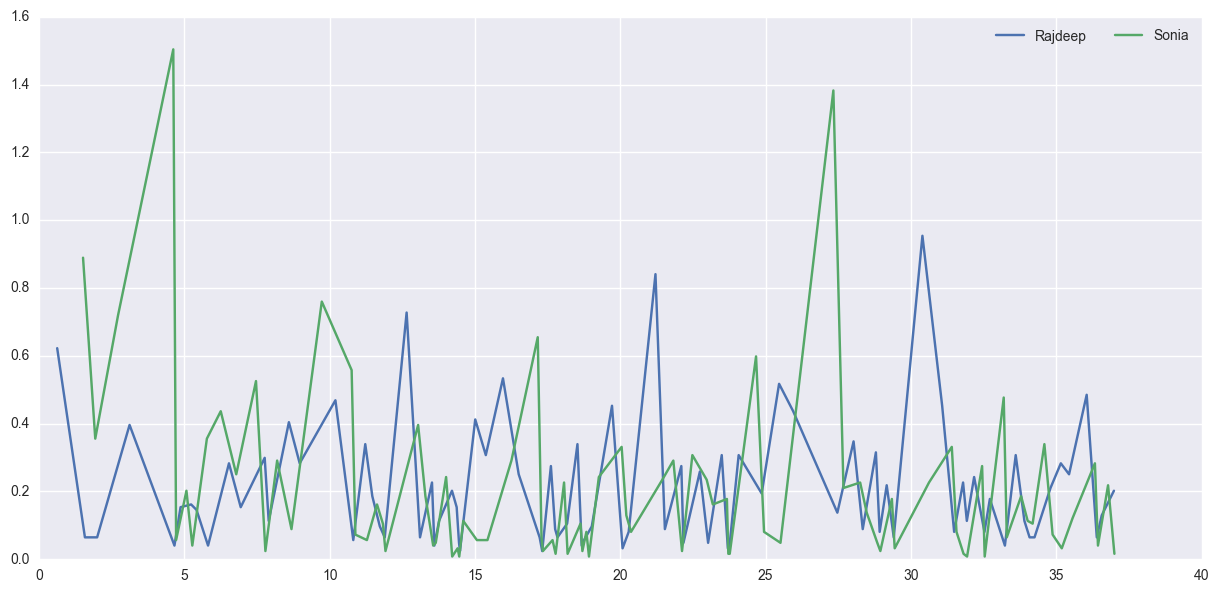

In [33]:
#Words used over time 
groups = Interview.groupby('Person')
fig, ax = plt.subplots(figsize=(15,7))
for person, group in groups:
    ax.plot(group['CumTime'], group['Time'], ms=1, label=person)
ax.legend(bbox_to_anchor=(1,1),ncol=2);

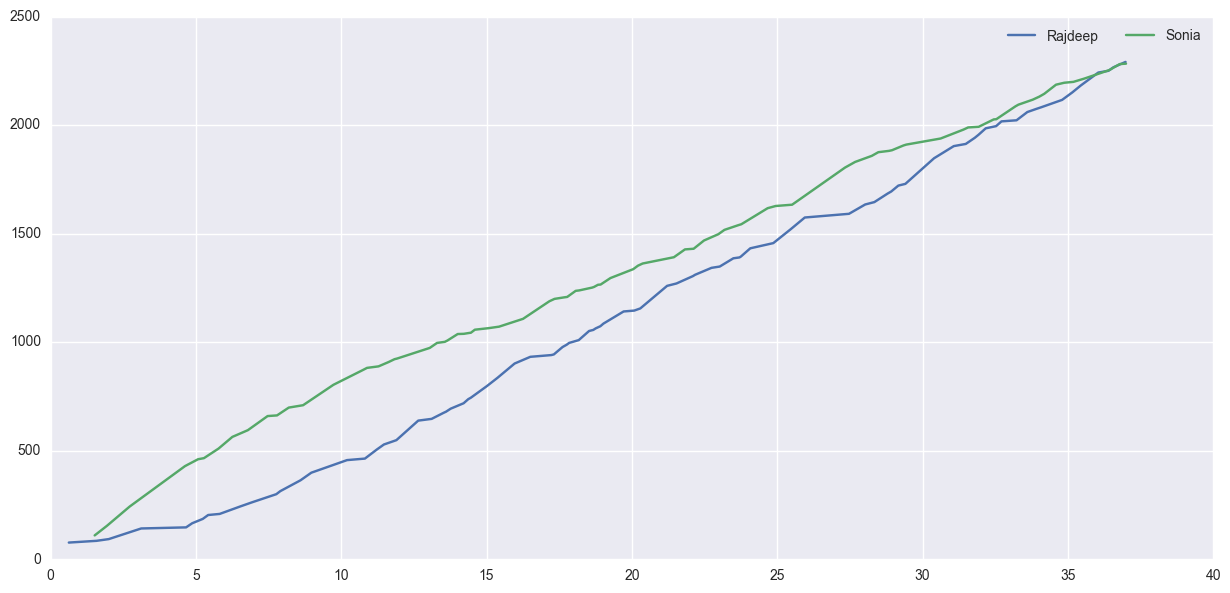

In [34]:
#Cumulative word use over time
groups = Interview.groupby('Person')
fig, ax = plt.subplots(figsize=(15,7))
for person, group in groups:
    ax.plot(group['CumTime'], group['CumCount'], ms=1, label=person)
ax.legend(bbox_to_anchor=(1,1),ncol=2);

## How did the length of questions relate to length of answers?

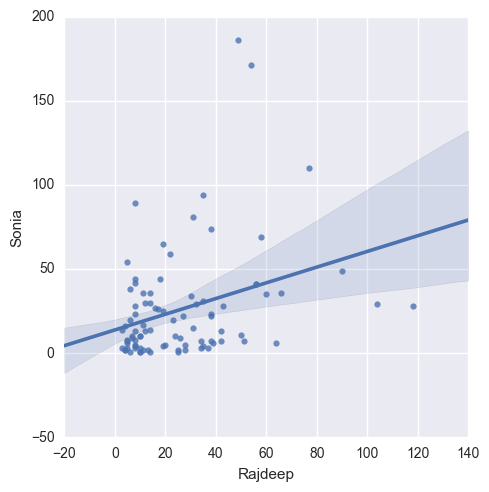

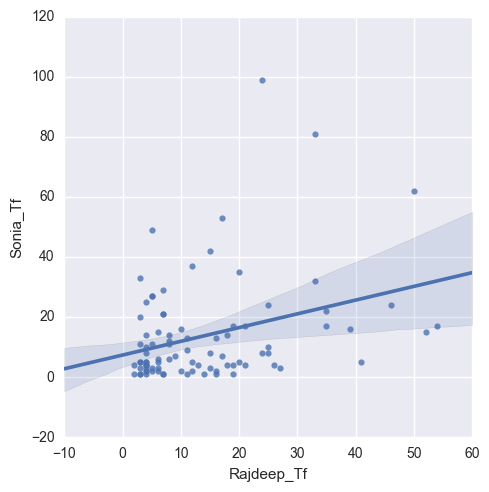

In [121]:
#Create DataFrame and add count to the Dataframe Count and Tfcount
dfSR = pd.DataFrame({ 'Rajdeep': range(0, 88  ,1),
                  'Sonia': range(0, 88 ,1) })
i =0
k = 0
while i <= (len(Interview.Person)-1):
    if Interview.loc[i,'Person']== 'Rajdeep' and Interview.loc[i+1,'Person']=='Sonia':
        dfSR.loc[k,'Rajdeep'] = Interview.loc[i,'Count']
        dfSR.loc[k,'Sonia'] = Interview.loc[i+1,'Count']
        dfSR.loc[k,'Rajdeep_Tf'] = Interview.loc[i,'TfCount']
        dfSR.loc[k,'Sonia_Tf'] = Interview.loc[i+1,'TfCount']
        k+=1
    i+=1

sns.lmplot('Rajdeep','Sonia', data=dfSR, fit_reg = True)
sns.lmplot('Rajdeep_Tf','Sonia_Tf', data=dfSR, fit_reg = True)

/Users/yashodhanjoglekar/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


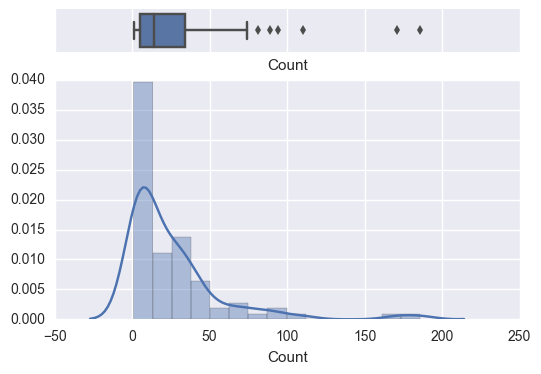

In [37]:
df_filtered = Interview[Interview['Person'] == 'Sonia']
x = df_filtered['Count']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist);

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

## Histogram

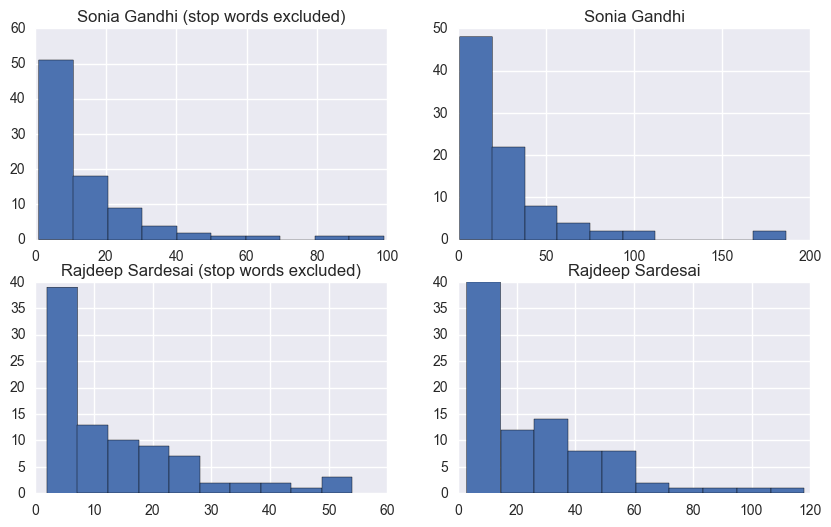

In [36]:
df_filtered_Sonia = Interview[Interview['Person'] == 'Sonia']
df_filtered_Rajdeep = Interview[Interview['Person'] == 'Rajdeep']

fig , ax = plt.subplots(2, 2, figsize=(10,6))

ax[0, 0].hist(df_filtered_Sonia['TfCount'] , bins=10)
ax[0, 0].set_title('Sonia Gandhi (stop words excluded)')

ax[0, 1].hist(df_filtered_Sonia['Count'] , bins=10)
ax[0, 1].set_title('Sonia Gandhi')

ax[1, 0].hist(df_filtered_Rajdeep['TfCount'] , bins=10)
ax[1, 0].set_title('Rajdeep Sardesai (stop words excluded)')

ax[1, 1].hist(df_filtered_Rajdeep['Count'] , bins=10)
ax[1, 1].set_title('Rajdeep Sardesai');

## Answers / Questions with 3 words or less?

In [113]:
#Without Stop Words
Interview1 = Interview[Interview.TfCount <=3]
Interview1.groupby('Person')['Time'].agg({'count'}).reset_index()

,Person,count
0,Rajdeep,10
1,Sonia,23


In [262]:
#With all Words
Interview2 = Interview[Interview.Count <=3]
Interview2.groupby('Person')['Time'].agg({'count'}).reset_index()

,Person,count
0,Rajdeep,2
1,Sonia,17


## Word Frequency

In [99]:
import nltk
from nltk.probability import FreqDist

#Merge text and create String
Sonia_merged = df_filtered_Sonia['Talk_filter'].str.cat(sep=' ').lower()
Rajdeep_merged = df_filtered_Rajdeep['Talk_filter'].str.cat(sep=' ').lower()
All_merged = Interview['Talk_filter'].str.cat(sep=', ').lower()

In [105]:
#Find the word frequencies 
def WordFreq(x,y,z):
    x = FreqDist()
    for sentence in nltk.tokenize.sent_tokenize(y):
        for word in nltk.tokenize.word_tokenize(sentence):
            x[word] += 1
    z = pd.DataFrame(list(x.items())).sort_values(by = 1,ascending = False)
    return z

for d,t,f in zip([fdistSonia,fdistRajdeep,fdistAll],
                 [Sonia_merged,Rajdeep_merged,All_merged],
                 [SoniaWordFrequency,RajdeepWordFrequency,AllWordFrequency]):
    WordFreq(d,t,f)

## Search Word Count for Specific Word 

In [112]:
#Replace the term in SearchWord to search for a particular word in the interview
# The output will show the word frequency individualy and total
#Replace word in '' to search, use lowercase only
SearchWord = 'absolutely'
S = SoniaWordFrequency[SoniaWordFrequency[0]== SearchWord]
R = RajdeepWordFrequency[RajdeepWordFrequency[0]== SearchWord]
A = AllWordFrequency[AllWordFrequency[0]== SearchWord]

#Search function
def SearchF(x):
    if x.empty: return 0
    else : return x.loc[x[0] == SearchWord,1].values[0] 

for df, name in zip([S,R,A], ['Sonia','Rajdeep','All']):
    print ('{0} : {1}'.format(name ,SearchF(df)))

Sonia : 14
Rajdeep : 0
All : 14


## Word Cloud

In [115]:
from PIL import Image
from wordcloud import WordCloud , STOPWORDS

#Text to be used - Sonia_merged, Rajdeep_merged ,All_merged
stopwords = set(STOPWORDS)

#Image Masks
Sonia_mask = np.array(Image.open('/Users/yashodhanjoglekar/Downloads/hand.png'))
Rajdeep_mask = np.array(Image.open('/Users/yashodhanjoglekar/Downloads/journalist.png'))
Zero_mask = np.array(Image.open('/Users/yashodhanjoglekar/Downloads/zeroinv.png'))

In [120]:
# Generate a word cloud image
wordcloudAll = WordCloud(background_color='white',max_font_size=100).generate(All_merged)

#Sonia Word Cloud
wcSonia = WordCloud(background_color="white", max_words=2000, mask=Sonia_mask,stopwords=stopwords)
wcSonia.generate(Sonia_merged)

#Word Cloud Zero
wcZero = WordCloud(background_color="white", max_words=2000, mask=Zero_mask, stopwords=stopwords)
wcZero.generate(All_merged)

# Rajdeep Word Cloud
wcRajdeep = WordCloud(background_color="white", max_words=2000, mask=Rajdeep_mask,stopwords=stopwords)
wcRajdeep.generate(Rajdeep_merged)

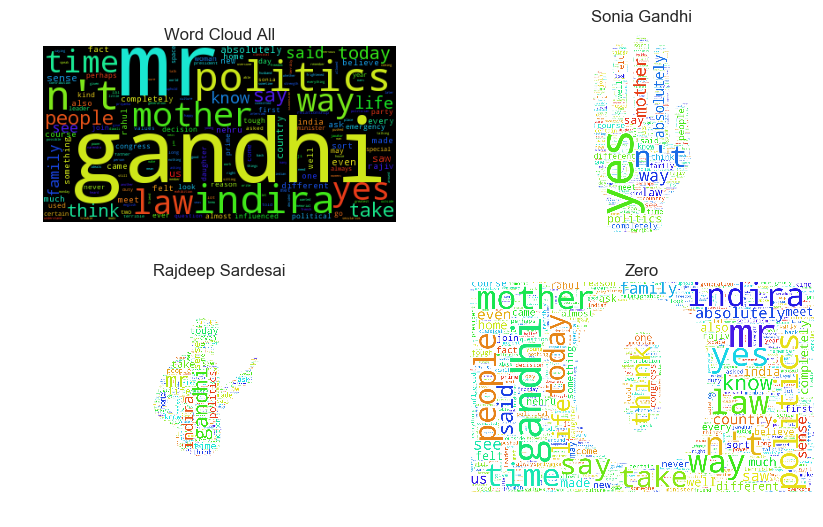

In [119]:
# Generate plot
fig , ax = plt.subplots(2, 2, figsize=(10,6))

ax[0, 0].imshow(wordcloudAll)
ax[0, 0].axis("off")
ax[0, 0].set_title('Word Cloud All')

ax[0, 1].imshow(wcSonia)
ax[0, 1].axis("off")
ax[0, 1].set_title('Sonia Gandhi')

ax[1, 0].imshow(wcRajdeep)
ax[1, 0].axis("off")
ax[1, 0].set_title('Rajdeep Sardesai')

ax[1, 1].imshow(wcZero)
ax[1, 1].axis("off")
ax[1, 1].set_title('Zero');